# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I, 
- **Donald Nkabinde**, 
- **Kobus Leach**,
- **Rinae Luvhani**,
- **Insert name here**,
- **Mfanafuthi Molefe**,

confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

# Predicting Energy Shortfall in Spain using Machine Learning 

In this notebook, our goal is to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain.

Since we are trying to predict a number, this kind of problem is known as a **regression problem**.

The data and evaluation metric we will be using (Root Mean Square Error or RMSE) are from the [Kaggle Spain Electricity Shortfall Challenge 2023 competition](https://www.kaggle.com/competitions/spain-electricity-shortfall-challenge-2023/overview/description).

## What we will end up with:

Since we already have a dataset, we will approach the problem with the following machine learning modelling framework.

| [<img src="ml101-6-step-ml-framework.png" style="max-width:100%; height:auto;"/>](https://whimsical.com/6-step-field-guide-to-machine-learning-projects-flowcharts-9g65jgoRYTxMXxDosndYTB) | 
|:--:| 

To work through these topics, we will use the following Python libraries:

- **[Numpy](https://numpy.org/)**: NumPy is a fundamental library for numerical computing in Python. It provides efficient array manipulation and mathematical operations, making it essential for many scientific computations.

- **[Pandas](https://pandas.pydata.org/)**: Pandas is a powerful library for data manipulation and analysis. It offers data structures like DataFrames that allow for easy handling, cleaning, and exploration of structured data.

- **[Matplotlib](https://matplotlib.org/)**: Matplotlib is a plotting library that enables the creation of various types of visualisations, such as line plots, scatter plots, histograms, and more. It provides flexibility and customisation options for creating publication-quality figures.

- **[Seaborn](https://seaborn.pydata.org/)**: Seaborn is a data visualisation library built on top of Matplotlib. It provides a simplified interface for creating attractive statistical graphics, including heatmaps, violin plots, and joint plots.

- **[Scikit-learn](https://scikit-learn.org/stable/)**: Scikit-learn is a machine learning library that offers a wide range of algorithms for classification, regression, clustering, and dimensionality reduction. It provides an easy-to-use API for model training, evaluation, and prediction.

By the end of the notebook, we will have a trained machine learning model which predicts the shortfall between the energy generated by means of fossil fuels and various renewable sources in Spain.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Problem Definition</a>

<a href=#two>2. Data</a>

<a href=#three>3. Evaluation</a>

<a href=#four>4. Features</a>

<a href=#five>5. Model Explanations</a>

<a id="one"></a>
## 1. Problem Definition
<a href=#cont>Back to Table of Contents</a>

For this dataset, the problem we are trying to solve, or better, the question we are trying to answer is,

> How well can we predict the future shortfall between the energy generated by means of fossil fuels and various renewable sources in Spain, given its characteristics previous examples?

<a id="two"></a>
## 2. Data
<a href=#cont>Back to Table of Contents</a>

There are two datasets:
1. **df_train.csv** - Historical weather conditions in various Spanish cities and 3 hourly shortfall (our target variable) examples for the time of 2015-2017. This dataset will be split into a train and validation set to evaluate our model so we can tune it before we can make our predictions
2. **df_test.csv** - Weather conditions in various Spanish cities from 1 January 2018 at 00:00 to 31 December 2018 at 21:00. This dataset will be used to make predictions from our trained model.

<a id="three"></a>
## 3. Evaluation
<a href=#cont>Back to Table of Contents</a>

For this problem, [Kaggle has set the evaluation metric to the Root Mean Square Error (RMSE)](https://www.kaggle.com/competitions/spain-electricity-shortfall-challenge-2023/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we will calculate the RMSE and then compare our results to others on the Kaggle leaderboard.

In addition to this, the R-squared (R^2) value will be used to evaluate the performance of our regression model. This metric provides an indication of how well our model fits the observed data.

<a id="four"></a>
## 4. Features
<a href=#cont>Back to Table of Contents</a>

Features are different parts of the data. During this step, we want to start finding out what we can about the data.

First, we will import the dataset and start exploring. Since we know the evaluation metric we are trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

### Importing packages and the data

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

pd.set_option("display.max_rows", None) # to see all rows of our dataframe
pd.set_option("display.max_columns", None) # to see all columns of our dataframe

In [2]:
# Import the training and validation set
df = pd.read_csv("df_train.csv")
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [3]:
# No parse_dates... check dtype of "time"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Our train dataset comprises of 8763 entries, and 48 features + the target feature (load_shortfall_3h). In total, there are 49 features with the following names:

In [4]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

 Currently, we have 3 `object` features. One of those is the `time` feature. First, we plot the first 1000 entries of our target variable vs time to see if a string `time` makes sense.

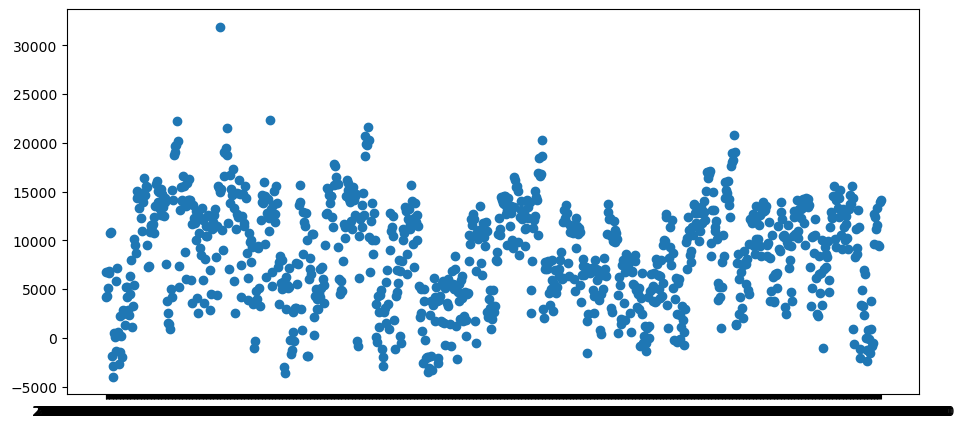

In [5]:
fig, ax = plt.subplots(figsize = (11, 5))
ax.scatter(df["time"][:1000], df["load_shortfall_3h"][:1000])

### Parsing dates
When working with time series data, it is a good idea to make sure any date data is the format of a [datetime object](https://docs.python.org/3/library/datetime.html) (a Python data type which encodes specific information about dates).

In [6]:
df = pd.read_csv("df_train.csv", low_memory = False, parse_dates = ["time"])
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [7]:
# With parse_dates... check dtype of "time"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

We have now converted our `time` variable to a datetime format. Plotting again, we get:

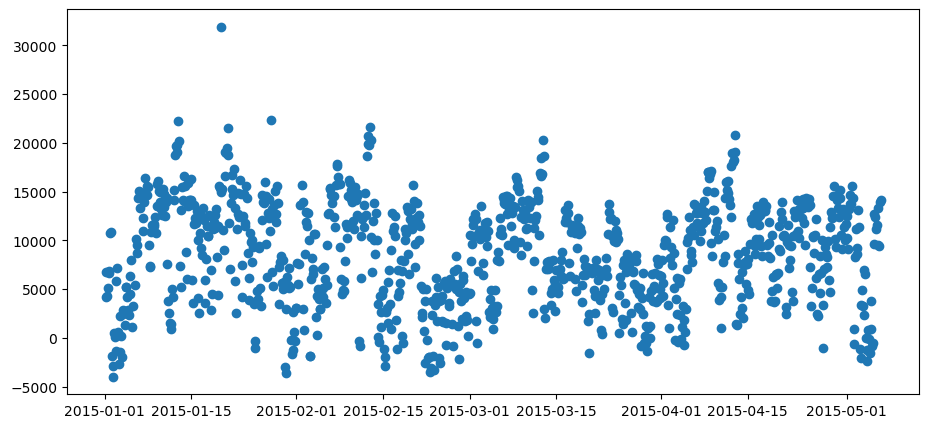

In [8]:
fig, ax = plt.subplots(figsize = (11, 5))
ax.scatter(df["time"][:1000], df["load_shortfall_3h"][:1000])

The x-axes is now a date format.

### Make a copy of the original DataFrame

Since we are going to be manipulating the data, we will make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame intact if we need it again.

In [9]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

### Add datetime parameters for time column

Why?

So we can enrich our dataset with as much information as possible.

Because we imported the data using `read_csv()` and we asked pandas to parse the dates using `parase_dates=["time"]`, we can now access the [different datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) of the `time` column.

In [10]:
# Add datetime parameters for time
df_tmp["Year"] = df_tmp["time"].dt.year
df_tmp["Month"] = df_tmp["time"].dt.month
df_tmp["Day"] = df_tmp["time"].dt.day
df_tmp["Dayofweek"] = df_tmp["time"].dt.dayofweek
df_tmp["Dayofyear"] = df_tmp["time"].dt.dayofyear

# Drop original time and Unnamed:0
df_tmp.drop(["Unnamed: 0", "time"], axis = 1, inplace = True)

In [11]:
df_tmp.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Dayofweek,Dayofyear
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,1
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,3,1
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,3,1
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,3,1
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,3,1


In [12]:
# Check for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   object 
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [13]:
# Check for missing values
df_tmp.isna().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

# Convert strings to categories

One way to help turn all of our data into numbers is to convert the columns with the object (string) datatype into a category datatype.

To do this we can use the [pandas types API](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality) which allows us to interact and manipulate the types of data.

In [14]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Valencia_wind_deg
Seville_pressure


In [15]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [16]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Madrid_wind_speed     8763 non-null   float64 
 1   Valencia_wind_deg     8763 non-null   category
 2   Bilbao_rain_1h        8763 non-null   float64 
 3   Valencia_wind_speed   8763 non-null   float64 
 4   Seville_humidity      8763 non-null   float64 
 5   Madrid_humidity       8763 non-null   float64 
 6   Bilbao_clouds_all     8763 non-null   float64 
 7   Bilbao_wind_speed     8763 non-null   float64 
 8   Seville_clouds_all    8763 non-null   float64 
 9   Bilbao_wind_deg       8763 non-null   float64 
 10  Barcelona_wind_speed  8763 non-null   float64 
 11  Barcelona_wind_deg    8763 non-null   float64 
 12  Madrid_clouds_all     8763 non-null   float64 
 13  Seville_wind_speed    8763 non-null   float64 
 14  Barcelona_rain_1h     8763 non-null   float64 
 15  Sevi

In [17]:
df_tmp["Valencia_wind_deg"].cat.categories

Index(['level_1', 'level_10', 'level_2', 'level_3', 'level_4', 'level_5',
       'level_6', 'level_7', 'level_8', 'level_9'],
      dtype='object')

In [18]:
df_tmp["Valencia_wind_deg"].cat.codes.head()

0    5
1    1
2    9
3    8
4    7
dtype: int8

All of our data is categorical and thus we can now turn the categories into numbers, however it is still missing values...

In [19]:
df_tmp.isnull().sum() / len(df_tmp)

Madrid_wind_speed       0.000000
Valencia_wind_deg       0.000000
Bilbao_rain_1h          0.000000
Valencia_wind_speed     0.000000
Seville_humidity        0.000000
Madrid_humidity         0.000000
Bilbao_clouds_all       0.000000
Bilbao_wind_speed       0.000000
Seville_clouds_all      0.000000
Bilbao_wind_deg         0.000000
Barcelona_wind_speed    0.000000
Barcelona_wind_deg      0.000000
Madrid_clouds_all       0.000000
Seville_wind_speed      0.000000
Barcelona_rain_1h       0.000000
Seville_pressure        0.000000
Seville_rain_1h         0.000000
Bilbao_snow_3h          0.000000
Barcelona_pressure      0.000000
Seville_rain_3h         0.000000
Madrid_rain_1h          0.000000
Barcelona_rain_3h       0.000000
Valencia_snow_3h        0.000000
Madrid_weather_id       0.000000
Barcelona_weather_id    0.000000
Bilbao_pressure         0.000000
Seville_weather_id      0.000000
Valencia_pressure       0.235992
Seville_temp_max        0.000000
Madrid_pressure         0.000000
Valencia_t

The `Valencia_pressure` column has about 24% of missing data. 

However, in the format it is in, our data is still good to be worked with, let us save it to file and reimport it so we can continue on.

### Save Processed Data

In [20]:
# Save preprocessed data
df_tmp.to_csv("df_train_tmp.csv", index = False)

In [21]:
# Import preprocessed data
df_tmp = pd.read_csv("df_train_tmp.csv", low_memory = False)
df_tmp.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Dayofweek,Dayofyear
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,1
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,3,1
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,3,1
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,3,1
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,3,1


In [23]:
# Check missing values
df_tmp.isna().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

Before we fill in missing values, we check for outliers in our data.

In [22]:
with pd.option_context("float_format", '{:.1f}'.format): print(df_tmp.describe().loc[["mean", "std", "min", "25%", "50%", "75%", "max"]].T) # this removes the "count" column

                        mean     std     min    25%     50%     75%       max
Madrid_wind_speed        2.4     1.9     0.0    1.0     2.0     3.3      13.0
Bilbao_rain_1h           0.1     0.4     0.0    0.0     0.0     0.1       3.0
Valencia_wind_speed      2.6     2.4     0.0    1.0     1.7     3.7      52.0
Seville_humidity        62.7    22.6     8.3   44.3    65.7    82.0     100.0
Madrid_humidity         57.4    24.3     6.3   36.3    58.0    78.7     100.0
Bilbao_clouds_all       43.5    32.6     0.0   10.0    45.0    75.0     100.0
Bilbao_wind_speed        1.9     1.7     0.0    0.7     1.0     2.7      12.7
Seville_clouds_all      13.7    24.3     0.0    0.0     0.0    20.0      97.3
Bilbao_wind_deg        159.0   102.1     0.0   73.3   147.0   234.0     359.3
Barcelona_wind_speed     2.9     1.8     0.0    1.7     2.7     4.0      12.7
Barcelona_wind_deg     190.5    89.1     0.0  118.2   200.0   260.0     360.0
Madrid_clouds_all       19.5    28.1     0.0    0.0     0.0    3

The `Barcelona_pressure` feature has large outliers. Plotting it we get:

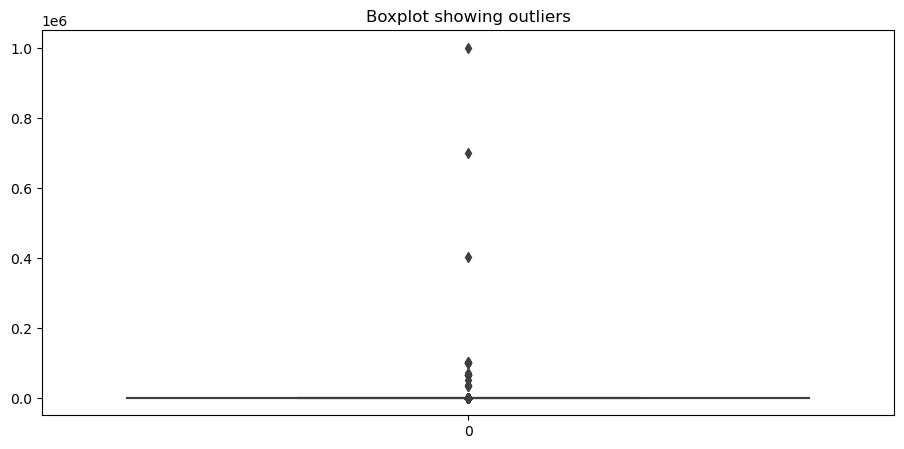

In [24]:
# Check for outliers in the Barcelona_pressure variable
plt.figure(figsize = (11, 5))
sns.boxplot(df_tmp['Barcelona_pressure'])
plt.title("Boxplot showing outliers")
plt.show()

We replace these missing values with NaNs.

In [25]:
# https://en.wikipedia.org/wiki/List_of_atmospheric_pressure_records_in_Europe
# If a record is not on the Wikipedia page, then it is an outlier
df_tmp.loc[df_tmp['Barcelona_pressure'] > 1051, 'Barcelona_pressure'] = np.nan
df_tmp.loc[df_tmp['Barcelona_pressure'] < 950, 'Barcelona_pressure'] = np.nan

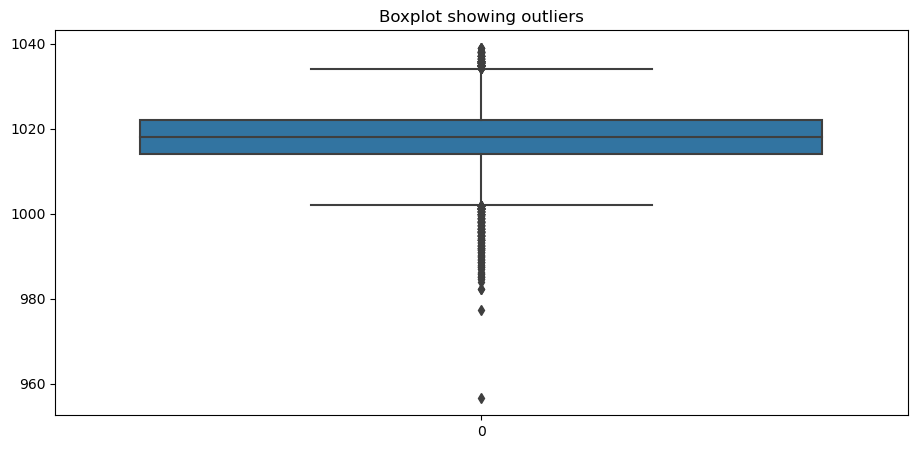

In [26]:
# Check for outliers in the Barcelona_pressure variable
plt.figure(figsize = (11, 5))
sns.boxplot(df_tmp['Barcelona_pressure'])
plt.title("Boxplot showing outliers")
plt.show()

#### Kurtosis
To see other features that have no obvious outliers, we consider and calculate the `kurtosis` of the features above. When the `Kurtosis` of the feature is >3 it indicates large number of outliers and when the `kurtosis` of the feature is <3 this indicate a lack of outliers. We will need to consider this when we are building our model because in a linear regression we assume that the errors are normally distributed and have constant variance (homoscedasticity). Outliers can violate these assumptions, affecting the accuracy and reliability of the model. We might consider removing the features with large outliers to improve our model performance

In [27]:
df_tmp.kurtosis(numeric_only = True)

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure         2.204829
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

In [28]:
# Get columns with a lot of outliers
kurtosis_values = df_tmp.kurtosis(numeric_only = True)
columns_with_outliers = kurtosis_values[kurtosis_values > 3].index
columns_with_outliers

Index(['Bilbao_rain_1h', 'Valencia_wind_speed', 'Bilbao_wind_speed',
       'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id',
       'Seville_weather_id'],
      dtype='object')

In [93]:
# # First, drop these columns
# df_tmp.drop(columns_with_outliers, axis = 1, inplace = True)
# df_tmp.head()

In [94]:
# df_tmp.kurtosis(numeric_only = True)

In [46]:
# df_no_outliers = df_tmp.copy()  # Create a copy of the original DataFrame

# for column in columns_with_outliers:
#     median_value = df_tmp[column].median()  # Calculate the median of the column
#     outlier_mask = np.abs(df_tmp[column] - median_value) > (3 * df_tmp[column].std())
#     df_no_outliers.loc[outlier_mask, column] = median_value

# # Print the resulting DataFrame with replaced outlier values
# df_no_outliers.kurtosis(numeric_only = True)

## Fill missing values

From our experience with machine learning models. We know two things:
1. All of our data has to be numerical
2. There cannot be any missing values

And as we have seen using `df_tmp.isna().sum()`, some columns have missing values.

### Filling numerical values first

We are going to fill any column with missing values with the median of that column.

In [29]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Madrid_wind_speed
Bilbao_rain_1h
Valencia_wind_speed
Seville_humidity
Madrid_humidity
Bilbao_clouds_all
Bilbao_wind_speed
Seville_clouds_all
Bilbao_wind_deg
Barcelona_wind_speed
Barcelona_wind_deg
Madrid_clouds_all
Seville_wind_speed
Barcelona_rain_1h
Seville_rain_1h
Bilbao_snow_3h
Barcelona_pressure
Seville_rain_3h
Madrid_rain_1h
Barcelona_rain_3h
Valencia_snow_3h
Madrid_weather_id
Barcelona_weather_id
Bilbao_pressure
Seville_weather_id
Valencia_pressure
Seville_temp_max
Madrid_pressure
Valencia_temp_max
Valencia_temp
Bilbao_weather_id
Seville_temp
Valencia_humidity
Valencia_temp_min
Barcelona_temp_max
Madrid_temp_max
Barcelona_temp
Bilbao_temp_min
Bilbao_temp
Barcelona_temp_min
Bilbao_temp_max
Seville_temp_min
Madrid_temp
Madrid_temp_min
load_shortfall_3h
Year
Month
Day
Dayofweek
Dayofyear


In [30]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Barcelona_pressure
Valencia_pressure


In [31]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it is more robust than the mean
            df_tmp[label] = content.fillna(content.median())

### Filling and turning categorical variables to numbers

Now we have filled the numeric values, we will do the same with the categorical values at the same time as turning them into numbers.

In [32]:
# Check columns which are not numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Valencia_wind_deg
Seville_pressure


In [33]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which *are not* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes + 1    

In [34]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   int8   
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [35]:
df_tmp.isna().sum()

Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_te

In [36]:
df_tmp.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Dayofweek,Dayofyear
0,0.666667,6,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,18,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,1
1,0.333333,2,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,18,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,3,1
2,1.000000,10,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,18,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,3,1
3,1.000000,9,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,18,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,3,1
4,1.000000,8,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,18,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1015.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,3,1


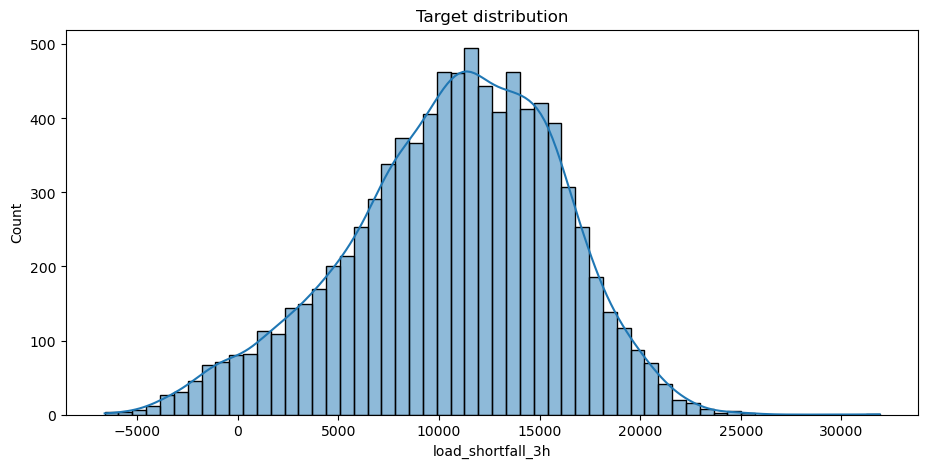

-0.384847070902431

In [37]:
# target distribution
plt.figure(figsize = (11, 5))
sns.histplot(data = df_tmp, x = 'load_shortfall_3h', kde = True) # update your matplotlib if you get an error here
plt.title("Target distribution")
plt.show()
df['load_shortfall_3h'].skew()

Our target variable shows a `fairly symmetrical distribution`, the distribution  has a skew value of `-0.384847`, this will be helpful when choosing the regression model to use. Usually if the distribution of the target variable is fairly symmetrical it is suited for the linear regression model.

### Splitting data into train and validation sets

In [38]:
X_train = df_tmp.drop("load_shortfall_3h", axis=1)
y_train = df_tmp["load_shortfall_3h"]

# Split the train dataset into training and validation sets
train_size = 0.8  # Proportion of the train dataset to use for training
validation_size = 0.2  # Proportion of the train dataset to use for validation

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = train_size, test_size = validation_size, random_state = 42)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((7010, 51), (7010,), (1753, 51), (1753,))

### Building an evaluation function


In [39]:
# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Validation MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
              "Validation RMSE": np.sqrt(mean_squared_error(y_valid, val_preds)),
              "Training R^2": model.score(X_train, y_train),
              "Validation R^2": model.score(X_valid, y_valid)}
    return scores

### Training our model

In [40]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [41]:
output = show_scores(model)
output

{'Training MAE': 873.3722305319687,
 'Validation MAE': 2393.7339519363786,
 'Training RMSE': 1169.2003090163707,
 'Validation RMSE': 3183.3684406582292,
 'Training R^2': 0.949350848482118,
 'Validation R^2': 0.6401706002737676}

**Training MAE (Mean Absolute Error)**: The training MAE value of 873.37 represents, on average, the magnitude of the model's predictions' deviation from the actual shortfall between energy generated by fossil fuels and renewables in the training dataset. A lower MAE suggests better accuracy in predicting the shortfall.

**Validation MAE**: The validation MAE value of 2393.73 indicates the average absolute difference between the predicted and actual shortfalls in the validation dataset. It signifies the model's typical prediction error when applied to unseen data. If the validation MAE is significantly higher than the training MAE, it may suggest potential issues with generalisation.

**Training RMSE (Root Mean Squared Error)**: The training RMSE value of 1169.2 measures the standard deviation of the model's prediction errors on the training data. It provides an estimate of how much the predicted shortfalls deviate from the actual values. A lower RMSE indicates better performance in capturing the variability of the shortfalls.

**Validation RMSE**: The validation RMSE value of 3183.37 represents the standard deviation of the model's prediction errors on the validation data. It indicates, on average, how much the predicted shortfalls deviate from the actual values in the validation set. If the validation RMSE is significantly higher than the training RMSE, it may suggest overfitting or limited generalization ability.

**Training R^2 (R-squared)**: The training R^2 value of 0.9494 indicates the proportion of the variance in the training data's shortfall between energy generated by fossil fuels and renewables that can be explained by the model. A higher R^2 implies that the model captures a substantial amount of the variability in the training data.

**Validation R^2**: The validation R^2 value of 0.6402 represents the proportion of the variance in the validation data's shortfall that can be explained by the model. It indicates how well the model generalises to new, unseen data. A higher validation R^2 suggests better generalisation.

Based on the validation R^2 value, our model can explain about 64% of the variance in the training data.


### Make predictions on test data

In [43]:
df_test = pd.read_csv("df_test.csv", parse_dates=["time"])
df_test.head()
df_test_1 = df_test.copy()

In [44]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["Year"] = df["time"].dt.year
    df["Month"] = df["time"].dt.month
    df["Day"] = df["time"].dt.day
    df["Dayofweek"] = df["time"].dt.dayofweek
    df["Dayofyear"] = df["time"].dt.dayofyear

    # Drop original time and Unnamed: 0
    df.drop(["Unnamed: 0", "time"], axis = 1, inplace = True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes + 1        
    
    return df

In [45]:
df_test = preprocess_data(df_test)
df_test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Day,Dayofweek,Dayofyear
0,5.000000,9,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,18,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,1014.666667,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,0,1
1,4.666667,9,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,18,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,1014.666667,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,0,1
2,2.333333,8,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,18,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,1014.666667,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,0,1
3,2.666667,8,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,18,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,1014.666667,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,0,1
4,4.000000,8,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,18,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,1014.666667,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,0,1


In [114]:
# X_train.head()

In [46]:
# Make predictions on the test dataset using the best model
test_preds = model.predict(df_test)

In [47]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["time"] = df_test_1["time"]
df_preds["load_shortfall_3h"] = test_preds
df_preds.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9600.810000
1,2018-01-01 03:00:00,8854.986667
2,2018-01-01 06:00:00,8569.566667
3,2018-01-01 09:00:00,9518.096667
4,2018-01-01 12:00:00,9889.646667


In [48]:
df_preds.to_csv('DN4_rfr_new.csv', index = False)

In [49]:
# saving our model
import pickle

model_save_path = "rfr_model.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(model, file)

In [50]:
model.feature_importances_

array([2.02515909e-02, 1.72619012e-02, 3.27352126e-03, 1.54190817e-02,
       2.06826696e-02, 1.93447788e-02, 1.00865261e-02, 1.34561672e-02,
       6.68537785e-03, 1.71703796e-02, 1.40472087e-02, 2.91701785e-02,
       6.80321863e-03, 1.34604600e-02, 4.87855471e-03, 1.26269436e-02,
       1.65266855e-03, 4.96662102e-04, 3.83219737e-02, 1.88596038e-03,
       1.60502640e-03, 4.25682366e-04, 1.67790007e-06, 7.54686241e-03,
       1.01237982e-02, 3.03885464e-02, 6.87131964e-03, 1.37504624e-02,
       1.52992591e-02, 1.92983165e-02, 7.33695875e-03, 6.50857872e-03,
       1.06077642e-02, 1.30867267e-02, 2.07492521e-02, 1.42870304e-02,
       1.02543903e-02, 1.01255715e-02, 9.33587825e-03, 1.23478792e-02,
       1.09303917e-02, 2.89643301e-02, 1.19527243e-02, 1.45685717e-02,
       8.85110382e-03, 1.04303677e-02, 4.80191350e-02, 1.95585262e-02,
       1.77537145e-01, 6.57183227e-02, 1.16542577e-01])

Since we are using the Random Forest regressor model, we can utilise the `feature_importances_` method to reveal the important features that were used in our model. The helper function below is used to visualise these features by order of importance.

In [52]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n = 60):
    df = (pd.DataFrame({"features": columns, "feature_importance": importances}).sort_values("feature_importance", ascending = False).reset_index(drop = True))
    
    sns.barplot(x = "feature_importance", y = "features", data = df[:n], orient = "h")

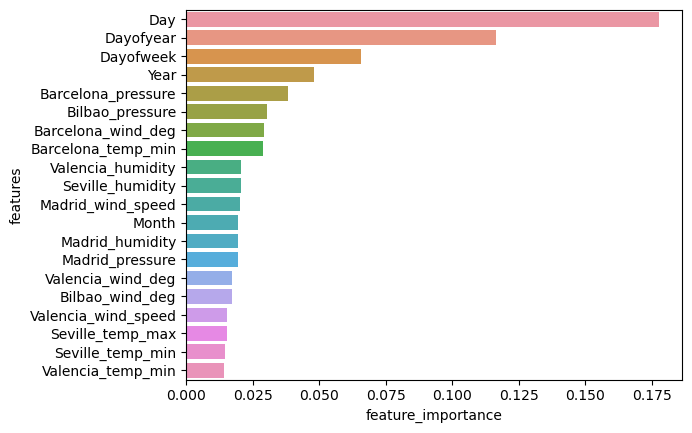

In [54]:
# plot 20 important features
plot_features(X_train.columns, model.feature_importances_, 20)

<a id="five"></a>
## 5. Model Explanations
<a href=#cont>Back to Table of Contents</a>

This section explains the model we picked to predict the future shortfall between the energy generated by means of fossil fuels and various renewable sources in Spain. Since we are attempting to predict a number, this is a regression problem. The regression model we chose is the Random Forest Regressor.

The Random Forest Regressor model tackles this problem as follows…

**Forest of Trees**: A Random Forest Regressor is made up of multiple decision trees, and together they form a "forest." Each tree in the forest is trained on a random subset of the original dataset, which means each tree sees a slightly different set of data.

**Decision Trees**: Imagine a decision tree as a series of questions about the factors affecting electricity shortfall. Each question splits the data into two based on a particular feature. For example, the first question could be, "Is the rainfall in Madrid greater than 3?" If the answer is yes, you go down the left branch of the tree; otherwise, you go down the right branch. Each subsequent question further splits the data until you reach the final prediction at the leaf nodes of the tree, which in this case would be the predicted future shortfall between the energy generated by means of fossil fuels and various renewable sources.

**Ensemble Learning**: The strength of a Random Forest Regressor lies in combining the predictions of multiple decision trees. Each tree independently makes its own prediction for the future shortfall based on the features it was trained on. Then, the random forest takes the average (or sometimes a weighted average) of all the individual predictions from all the trees to get the final prediction. This ensemble approach helps to reduce the bias and variance of the predictions, leading to more accurate results.

**Feature Importance**: Another advantage of Random Forest is its ability to provide insights into feature importance. By analysing the collective behaviour of all the trees in the forest, we can understand which features have the most impact on the prediction. This information is valuable for feature selection and understanding the underlying patterns in the data.

To summarise, a Random Forest Regressor combines the predictions of multiple decision trees, each trained on a different subset of the data, to make accurate predictions. By leveraging the collective knowledge of the trees, it can handle complex relationships between features and provide valuable insights into feature importance. This makes it a powerful and versatile model for prediction tasks like the one at hand.
